In [16]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from os import listdir, path
from sbi.analysis import pairplot
# from scipy import stats
import pandas as pd
import gbi.utils.utils as gbi_utils

import matplotlib.font_manager
font_files = matplotlib.font_manager.findSystemFonts(fontpaths=['../../fonts/'], fontext='ttf')
matplotlib.font_manager.fontManager.addfont(font_files[0])

# specify matplotlib rc file
plt.style.use('../../../.matplotlibrc')
mpl.rcParams['font.family'] = 'Arial'

In [9]:
task_name = "linear_gaussian"
inference_dir = "../../../results/benchmark/algorithms/"

all_infereces = np.sort(listdir(f"{inference_dir}/{task_name}/"))
print(all_infereces)
inference_datetime = all_infereces[-2]
all_collections = np.sort(listdir(f"{inference_dir}/{task_name}/{inference_datetime}/posterior_samples_collected/"))
print(all_collections)
collection_datetime = all_collections[-1]
print(f"inference: {inference_datetime}, collection: {collection_datetime}")
df_summaries = pd.read_csv(f"{inference_dir}/{task_name}/{inference_datetime}/posterior_samples_collected/{collection_datetime}/summary_collected.csv", index_col=0)
betas = df_summaries[df_summaries['algorithm']=='GT']['beta'].unique()

['2023_04_21__22_38_19' '2023_05_03__18_41_31' '2023_05_07__20_08_28']
['2023_05_05__17_41_42']
inference: 2023_05_03__18_41_31, collection: 2023_05_05__17_41_42


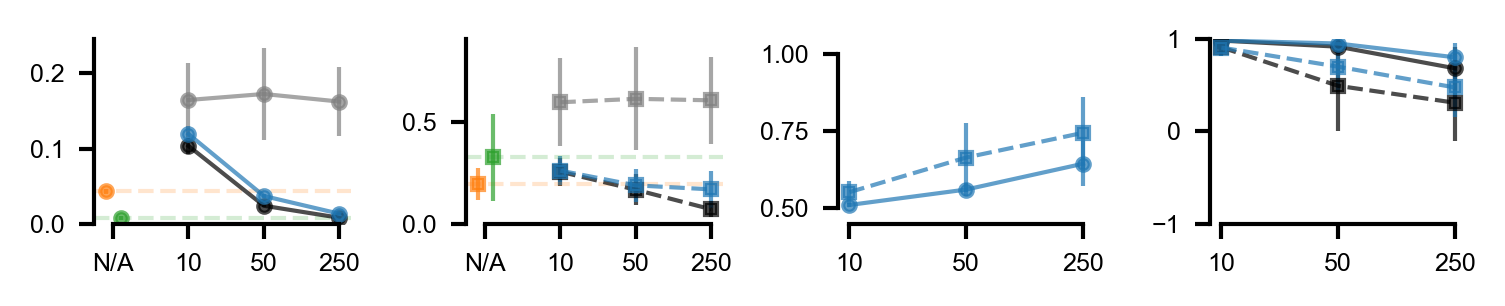

In [17]:
C_DICT = {'GT':'C0', 'GBI':'C1', 'eGBI':'C3', 'ABC':'gray', 'NPE':'C2', 'NLE':'C3'}
df_collapsed = df_summaries.groupby(['algorithm','beta','xo_specified']).describe()
plt.figure(figsize=(5.,1.), dpi=300)
for i_s, is_specified in enumerate(['specified', 'misspecified']):
    plt.subplot(1,4,i_s+1)
    for i_a, alg in enumerate(C_DICT.keys()):
        metric_to_plot = 'dist_samples_mean'
        df_cur = df_collapsed.loc[alg, :, is_specified][metric_to_plot]
        if alg in ['GT', 'GBI', 'ABC']:
            plt.errorbar(range(len(df_cur['mean'])), df_cur['mean'].values, yerr=df_cur['std'].values, fmt='-o' if i_s==0 else '--s', color=C_DICT[alg],label=alg, lw=1, alpha=0.7)
        elif alg in ['NLE', 'NPE']:
            plt.errorbar(-1+((i_a%2)-0.5)*0.2, df_cur['mean'].values, yerr=df_cur['std'].values, fmt='o' if i_s==0 else 's', color=C_DICT[alg], label=alg, lw=1, alpha=0.7)
            plt.axhline(df_cur['mean'].values, color=C_DICT[alg], ls='--', alpha=0.2, lw=1)
            # plt.fill_between([-1,3], df_cur['mean'].values+df_cur['std'].values, df_cur['mean'].values-df_cur['std'].values, alpha=0.1, color=f'C{i_a}')

        # plt.xlim([-0.25,2.25])
        
    plt.xticks([-1,0,1,2], ['N/A']+list(df_collapsed.loc['GBI',:,'specified'].index.values.astype(int)))        
    # if i_s==0: plt.ylabel('mean predictive\nsample distance')        
    plt.gca().spines.bottom.set_bounds((-1, 2))
    plt.ylim(0, None); plt.gca().spines.left.set_bounds((0, plt.ylim()[1]))
    # plt.xlabel('beta'); 
    # plt.title(f'{task_name}: ' + ('well-specified' if i_s==0 else 'misspecified'))        
    
    
plt.subplot(1,4,3)        
for i_s, is_specified in enumerate(['specified', 'misspecified']):
    alg='GBI'
    df_cur = df_collapsed.loc[alg, :, is_specified]['c2st']
    plt.errorbar(range(len(df_cur['mean'])), df_cur['mean'].values, yerr=df_cur['std'].values, fmt='-o' if i_s==0 else '--s', color=C_DICT[alg],label=alg, lw=1, alpha=0.7)

plt.xticks([0,1,2], list(df_collapsed.loc['GBI',:,'specified'].index.values.astype(int)))
# plt.ylabel('corr(GT vs. estimate distance)')
plt.gca().spines.bottom.set_bounds((0, 2))
plt.ylim(.45, 1.05); plt.gca().spines.left.set_bounds((.5, 1))

plt.subplot(1,4,4)        
for i_s, is_specified in enumerate(['specified', 'misspecified']):
    for alg in ['GT', 'GBI']:
        df_cur = df_collapsed.loc[alg, :, is_specified]['r_dist_gt_estimate']
        plt.errorbar(range(len(df_cur['mean'])), df_cur['mean'].values, yerr=df_cur['std'].values, fmt='-o' if i_s==0 else '--s', color=C_DICT[alg],label=alg, lw=1, alpha=0.7)

plt.xticks([0,1,2], list(df_collapsed.loc['GBI',:,'specified'].index.values.astype(int)))
# plt.ylabel('corr(GT vs. estimate distance)')
plt.gca().spines.bottom.set_bounds((0, 2))
plt.ylim(-1, 1); plt.gca().spines.left.set_bounds((-1, 1))

        
# plt.subplot(1,2,2)
    # plt.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.5,1), fontsize=6)
#put legend outside of plot
# plt.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.2,1))
plt.tight_layout()

['2023_04_21__22_38_19' '2023_05_03__18_41_31' '2023_05_07__20_08_28']
['2023_05_04__10_29_53']
inference: 2023_05_03__18_41_31, collection: 2023_05_04__10_29_53
['2023_04_21__22_38_19' '2023_05_03__18_41_31' '2023_05_07__20_08_28']
['2023_05_04__16_52_35']
inference: 2023_05_03__18_41_31, collection: 2023_05_04__16_52_35
['2023_04_21__22_38_19' '2023_05_03__18_41_31' '2023_05_07__20_08_28']
['2023_05_05__17_41_42']
inference: 2023_05_03__18_41_31, collection: 2023_05_05__17_41_42
['2023_04_21__22_38_19' '2023_05_01__23_32_09' '2023_05_03__18_41_31'
 '2023_05_07__20_08_28']
['2023_05_05__18_11_23']
inference: 2023_05_03__18_41_31, collection: 2023_05_05__18_11_23


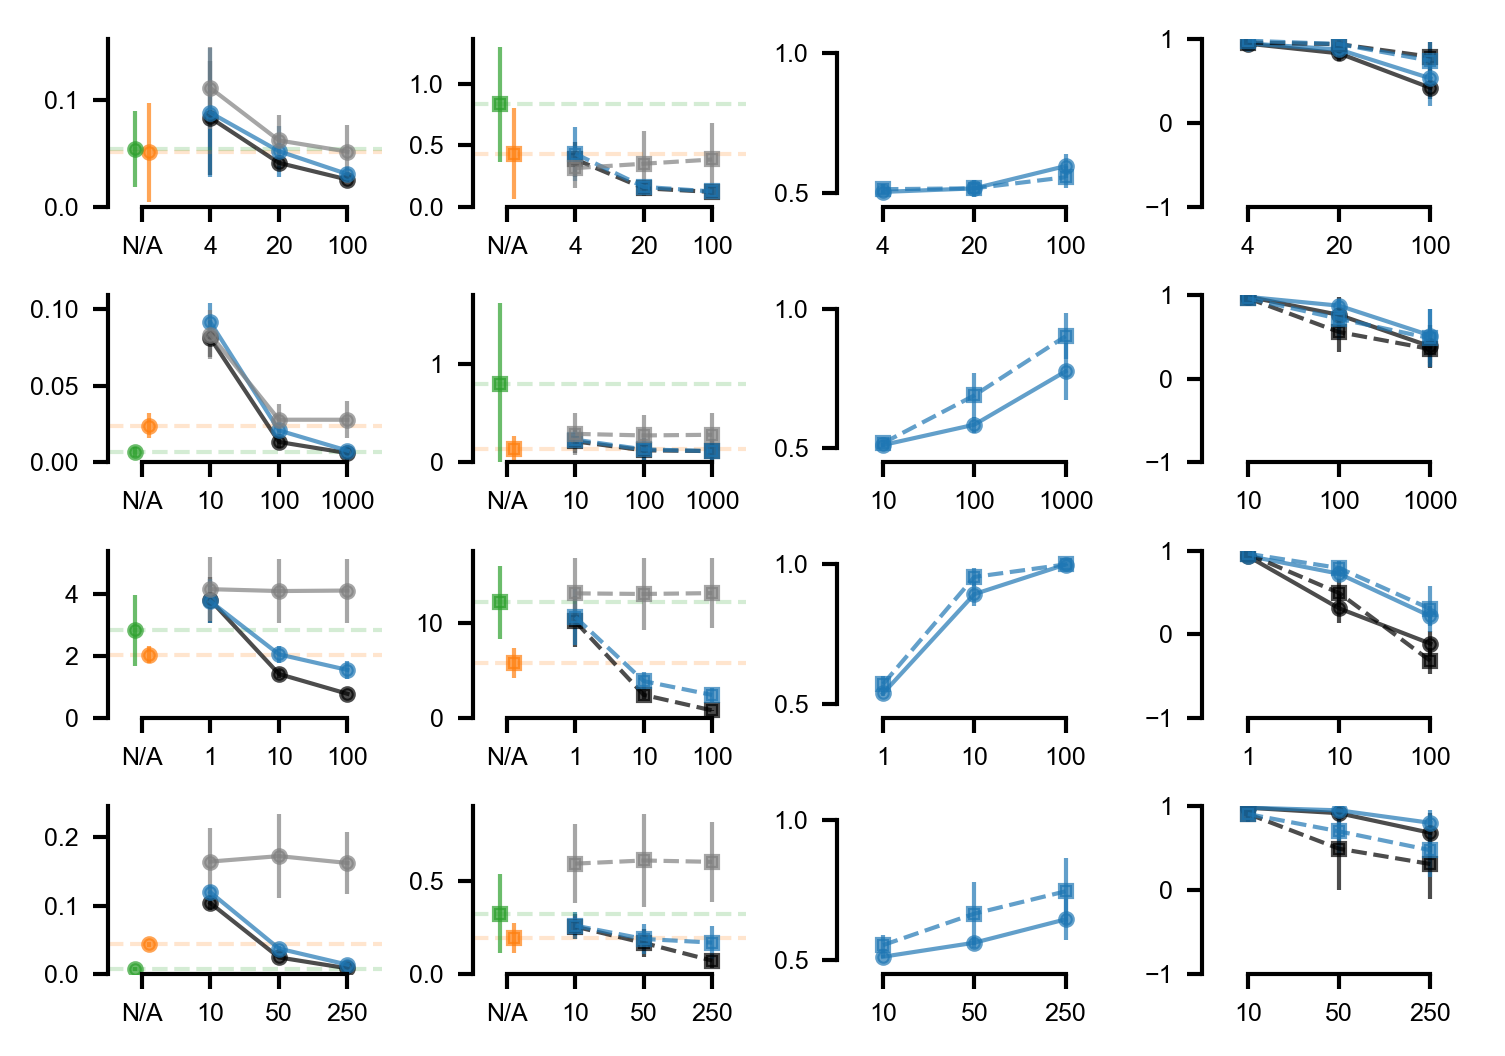

In [27]:
# C_DICT = {'GT':'k', 'GBI':'C0', 'eGBI':'C3', 'ABC':'gray', 'NPE':'C1', 'NLE':'C2'}
C_DICT = {'GT':'C0', 'GBI':'C1', 'ABC':'gray', 'NPE':'C2', 'NLE':'C3'}

inference_dir = "../../../results/benchmark/algorithms/"

plot_tasks = ["uniform_1d", "two_moons", "linear_gaussian", "gaussian_mixture"]
with mpl.rc_context(fname="../../../.matplotlibrc"):
    plt.figure(figsize=(5.,3.5), dpi=300)

    for i_t, task_name in enumerate(plot_tasks):
        all_infereces = np.sort(listdir(f"{inference_dir}/{task_name}/"))
        print(all_infereces)
        inference_datetime = all_infereces[-2]
        all_collections = np.sort(listdir(f"{inference_dir}/{task_name}/{inference_datetime}/posterior_samples_collected/"))
        print(all_collections)
        collection_datetime = all_collections[-1]
        print(f"inference: {inference_datetime}, collection: {collection_datetime}")
        df_summaries = pd.read_csv(f"{inference_dir}/{task_name}/{inference_datetime}/posterior_samples_collected/{collection_datetime}/summary_collected.csv", index_col=0)
        betas = df_summaries[df_summaries['algorithm']=='GT']['beta'].unique()

        df_collapsed = df_summaries.groupby(['algorithm','beta','xo_specified']).describe()    
        
        for i_s, is_specified in enumerate(['specified', 'misspecified']):
            plt.subplot(len(plot_tasks),4,len(plot_tasks)*i_t+i_s+1)
            for i_a, alg in enumerate(C_DICT.keys()):
                metric_to_plot = 'dist_samples_mean'
                df_cur = df_collapsed.loc[alg, :, is_specified][metric_to_plot]
                if alg in ['GT', 'GBI', 'ABC']:
                    plt.errorbar(range(len(df_cur['mean'])), df_cur['mean'].values, yerr=df_cur['std'].values, fmt='-o' if i_s==0 else '--s', color=C_DICT[alg],label=alg, lw=1, alpha=0.7)
                elif alg in ['NLE', 'NPE']:
                    plt.errorbar(-1+((i_a%2)-0.5)*0.2, df_cur['mean'].values, yerr=df_cur['std'].values, fmt='o' if i_s==0 else 's', color=C_DICT[alg], label=alg, lw=1, alpha=0.7)
                    plt.axhline(df_cur['mean'].values, color=C_DICT[alg], ls='--', alpha=0.2, lw=1)
                    # plt.fill_between([-1,3], df_cur['mean'].values+df_cur['std'].values, df_cur['mean'].values-df_cur['std'].values, alpha=0.1, color=f'C{i_a}')

                # plt.xlim([-0.25,2.25])
                
            plt.xticks([-1,0,1,2], ['N/A']+list(df_collapsed.loc['GBI',:,'specified'].index.values.astype(int)))        
            # if i_s==0: plt.ylabel('mean predictive\nsample distance')
            # if i_s==0: plt.ylabel(task_name)
            plt.gca().spines.bottom.set_bounds((-1, 2))
            plt.xlim(-1.5, 2.5)
            plt.ylim(0, None); plt.gca().spines.left.set_bounds((0, plt.ylim()[1]))            
            # plt.xlabel('beta'); 
            # plt.title(f'{task_name}: ' + ('well-specified' if i_s==0 else 'misspecified'))        
            
            
        plt.subplot(len(plot_tasks),4,len(plot_tasks)*i_t+3)        
        for i_s, is_specified in enumerate(['specified', 'misspecified']):
            alg='GBI'
            df_cur = df_collapsed.loc[alg, :, is_specified]['c2st']
            plt.errorbar(range(len(df_cur['mean'])), df_cur['mean'].values, yerr=df_cur['std'].values, fmt='-o' if i_s==0 else '--s', color=C_DICT[alg],label=alg, lw=1, alpha=0.7)

        plt.xticks([0,1,2], list(df_collapsed.loc['GBI',:,'specified'].index.values.astype(int)))
        # plt.ylabel('corr(GT vs. estimate distance)')
        plt.gca().spines.bottom.set_bounds((0, 2))
        plt.yticks([.5,1])
        plt.ylim(.45, 1.05); plt.gca().spines.left.set_bounds((.5, 1))
        plt.xlim(-.5, 2.5)

        plt.subplot(len(plot_tasks),4,len(plot_tasks)*i_t+4)        
        for i_s, is_specified in enumerate(['specified', 'misspecified']):
            for alg in ['GT', 'GBI']:
                df_cur = df_collapsed.loc[alg, :, is_specified]['r_dist_gt_estimate']
                plt.errorbar(range(len(df_cur['mean'])), df_cur['mean'].values, yerr=df_cur['std'].values, fmt='-o' if i_s==0 else '--s', color=C_DICT[alg],label=alg, lw=1, alpha=0.7)

        plt.xticks([0,1,2], list(df_collapsed.loc['GBI',:,'specified'].index.values.astype(int)))
        # plt.ylabel('corr(GT vs. estimate distance)')
        plt.gca().spines.bottom.set_bounds((0, 2))        
        plt.ylim(-1, 1); plt.gca().spines.left.set_bounds((-1, 1))
        plt.yticks([-1,0,1])
        plt.xlim(-.5, 2.5)

                
        # plt.subplot(1,2,2)
            # plt.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.5,1), fontsize=6)
        #put legend outside of plot
        # plt.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.2,1))
        plt.tight_layout()

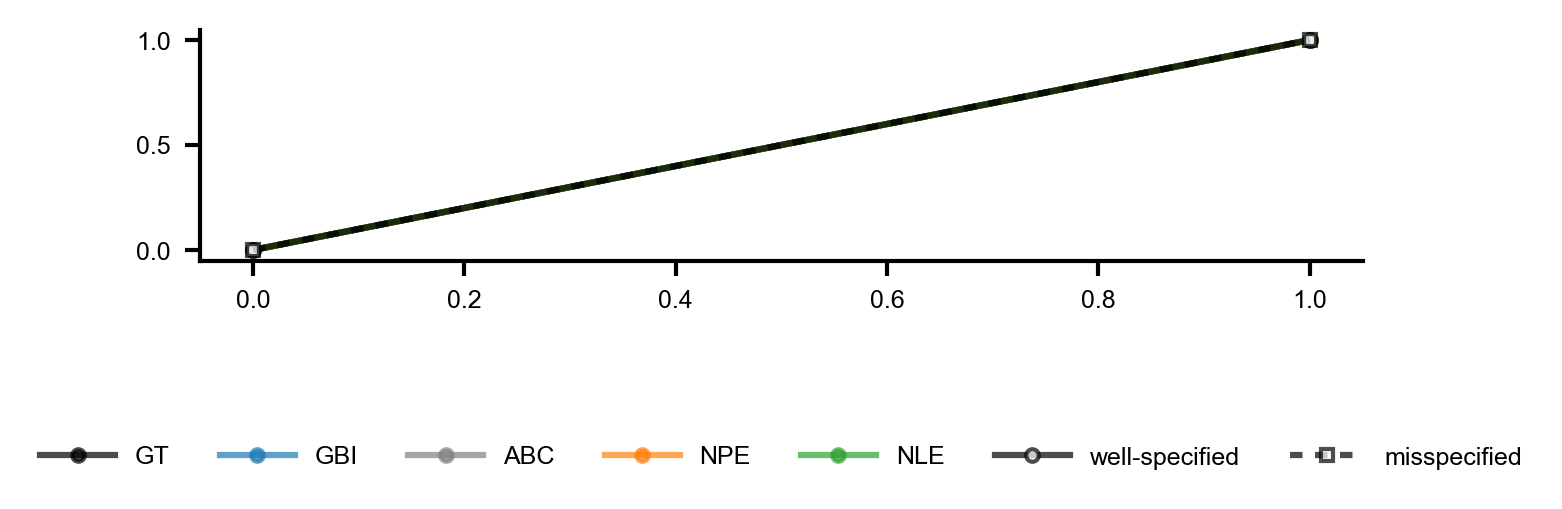

In [67]:
plt.figure(figsize=(5.,1), dpi=300)
for i_a, alg in enumerate(C_DICT.keys()):
    plt.plot([0,1], [0,1], 'o-', color=C_DICT[alg], alpha=0.7, label=alg)

plt.plot([0,1], [0,1], 'ko-', mfc='w', alpha=0.7, label='well-specified')
plt.plot([0,1], [0,1], 'k--s', mfc='w', alpha=0.7, label='misspecified', dashes=[2,2])

# plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(0.5,0))
# put legend horizontally
plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(0.5,-1), ncol=7, handlelength=3)
# plt.tight_layout()

In [59]:
1

1

In [ ]:
task_name = "gaussian_mixture"
inference_dir = "../../results/benchmark/algorithms/"
print(np.sort(listdir(f"{inference_dir}/{task_name}/")))
inference_datetime = np.sort(listdir(f"{inference_dir}/{task_name}/"))[-1]
print(inference_datetime)
collection_datetime=np.sort(listdir(f"{inference_dir}/{task_name}/{inference_datetime}/posterior_samples_collected/"))[-1]
df_summaries = pd.read_csv(f"{inference_dir}/{task_name}/{inference_datetime}/posterior_samples_collected/{collection_datetime}/summary_collected.csv", index_col=0)
# df_summaries = df_summaries.drop(df_summaries[df_summaries['algorithm']=='eGBI'].index)

betas = df_summaries[df_summaries['algorithm']=='GT']['beta'].unique()

FileNotFoundError: [Errno 2] No such file or directory: '../results/benchmark/algorithms//gaussian_mixture/'

In [87]:
inference = gbi_utils.pickle_load('../results/benchmark/algorithms/linear_gaussian/2023_04_19__19_14_38/GBI/inference.pickle')

torch.Size([1000, 1120])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


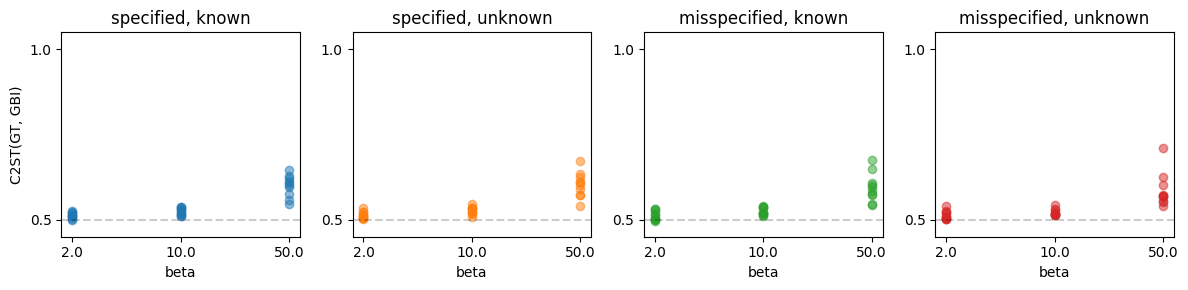

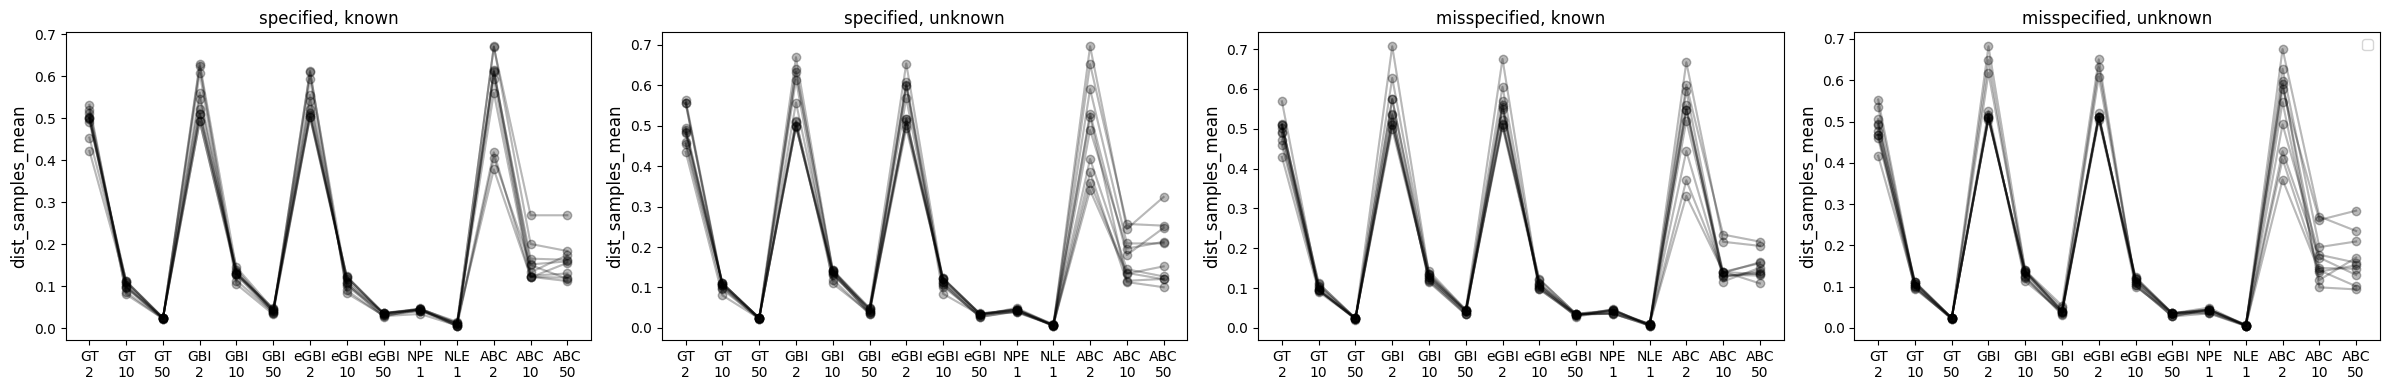

In [17]:
plt.figure(figsize=(12,3))

for i_s, specified in enumerate(['specified', 'misspecified']):
    for i_k, known in enumerate(['known', 'unknown']):
        plt.subplot(1,4,i_s*2+i_k+1)            
        for xo in range(10):
            df_cur = df_summaries[(df_summaries['algorithm']=="GBI")&(df_summaries['xo_idx']==xo)&(df_summaries['xo_specified']==specified)&(df_summaries['xo_known']==known)]            
            
            plt.plot(range(len(df_cur['beta'])), df_cur['c2st'], 'o', color=f"C{i_s*2+i_k}", alpha=0.5)
            
        plt.xticks(ticks=range(3),labels=df_cur[df_cur['algorithm']=='GBI']['beta'].unique())        
        plt.ylim([0.45,1.05]); plt.yticks([0.5,1])
        plt.axhline(0.5, alpha=0.2, color='k', linestyle='--')
        plt.title(f"{specified}, {known}")
        plt.xlabel('beta')

plt.subplot(1,4,1)
plt.ylabel('C2ST(GT, GBI)')
plt.tight_layout()
metric_to_plot = 'dist_samples_mean'
# metric_to_plot = 'mse_dist_gt_estimate'
# metric_to_plot = 'r_dist_gt_estimate'
plt.figure(figsize=(24,4))
for i_s, specified in enumerate(['specified', 'misspecified']):
    for i_k, known in enumerate(['known', 'unknown']):
        plt.subplot(1,4,i_s*2+i_k+1)            
        for xo in range(10):
            df_cur = df_summaries[(df_summaries['xo_idx']==xo)&(df_summaries['xo_specified']==specified)&(df_summaries['xo_known']==known)]     
            df_cur = df_cur.iloc[[6,7,8,3,4,5, 11,12,13, 10,9,0,1,2]]       
            for i_, i_b in enumerate([3,4,5]):
#                 # GBI GT vs. GBI estimated
#                 plt.plot(df_cur['dist_sample_mean'].iloc[-1], df_cur['dist_sample_mean'].iloc[i_b], 'o', color=f"C{i_}", label=betas[i_] if xo==0 else None, alpha=0.5)
#                 # plt.errorbar(df_cur['dist_sample_mean'].iloc[-1], df_cur['dist_sample_mean'].iloc[i_b], xerr=df_cur['dist_sample_std'].iloc[-1], yerr=df_cur['dist_sample_std'].iloc[i_b], color=f"C{i_}", alpha=0.1)
                
#                 # NPE vs. GBI estimated
#                 plt.plot(df_cur['dist_sample_mean'].iloc[i_b-3], df_cur['dist_sample_mean'].iloc[i_b], '*', color=f"C{i_}", alpha=0.5)

                plt.plot(df_cur[metric_to_plot].values, 'ok-', alpha=0.1)
        plt.xticks(range(len(df_cur)), labels=[f"{row['algorithm']}\n{row['beta']:.0f}" for _, row in df_cur.iterrows()])
        
        # XL = [0,plt.ylim()[1]]
        # plt.plot(XL, XL, 'k--', alpha=0.1)            
        plt.title(f"{specified}, {known}")
        plt.ylabel(metric_to_plot, fontsize=12)
        # plt.ylim(0,df_summaries['dist_sample_mean'].max())
        # plt.xticks(XL);plt.yticks(XL);
        # plt.xlabel('GT/NPE'); plt.ylabel('GBI')
        # plt.xscale('log')
        # plt.yscale('log');

plt.legend()
plt.tight_layout()




# df_summaries[(df_summaries['xo_idx']==xo)&(df_summaries['xo_specified']==specified)&(df_summaries['xo_known']==known)]

In [260]:
x_o = torch.rand(1,4,5)
x_o.repeat(10, *[1]*len(x_o[0].shape)).shape

torch.Size([10, 4, 5])